In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1) Data Exploration

#### 1.1) Training dataset

In [2]:
df=pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df=df.dropna()            # dealing with null values of training dataset

In [4]:
df.isnull().sum()         # checking for null values training dataset

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [5]:
df.info()         # checking for data types of each column training dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   object 
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(2), object(10)
mem

In [6]:
df.describe().T     # Checking for stats of each column training dataset

,count,mean,std,min,25%,50%,75%,max
enrollee_id,8955.0,16869.638749,9963.804718,2.000,8150.000,16924.00,25902.00,33380.000
city_development_index,8955.0,0.844570,0.116178,0.448,0.794,0.91,0.92,0.949
training_hours,8955.0,65.074930,60.235087,1.000,23.000,47.00,88.00,336.000
target,8955.0,0.165606,0.371747,0.000,0.000,0.00,0.00,1.000


#### 1.2) Testing dataset

In [7]:
df_=pd.read_csv('aug_test.csv')
df_.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [8]:
df_=df_.dropna()   # Dealing with null values of testing dataset

In [9]:
df_.isnull().sum()  # checking for null values of testing dataset

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [10]:
df_.info()              # checking for data types of each column testing dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 3 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1019 non-null   int64  
 1   city                    1019 non-null   object 
 2   city_development_index  1019 non-null   float64
 3   gender                  1019 non-null   object 
 4   relevent_experience     1019 non-null   object 
 5   enrolled_university     1019 non-null   object 
 6   education_level         1019 non-null   object 
 7   major_discipline        1019 non-null   object 
 8   experience              1019 non-null   object 
 9   company_size            1019 non-null   object 
 10  company_type            1019 non-null   object 
 11  last_new_job            1019 non-null   object 
 12  training_hours          1019 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 111.5+ KB


In [11]:
df_.describe().T             # Checking for stats of each column testing dataset

,count,mean,std,min,25%,50%,75%,max
enrollee_id,1019.0,16877.823356,10022.496322,30.000,7927.000,16462.00,25944.50,33353.000
city_development_index,1019.0,0.839644,0.117586,0.487,0.767,0.91,0.92,0.949
training_hours,1019.0,64.884200,60.813980,1.000,23.000,47.00,86.00,334.000


### 2) Data Visualisation

#### 2.1) Training dataset

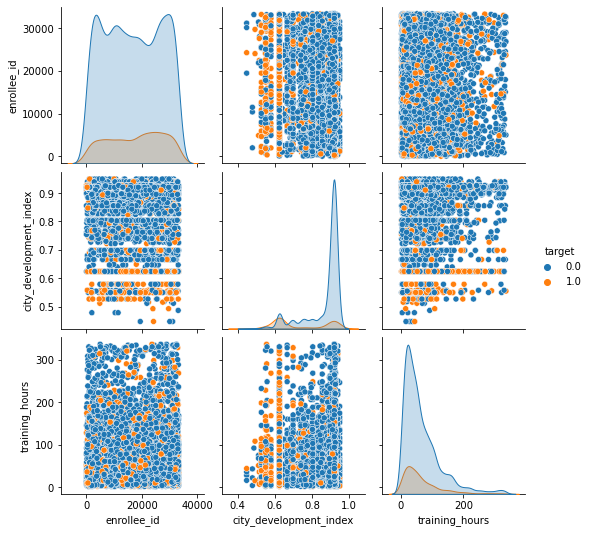

In [12]:
sns.pairplot(data=df, hue = 'target')

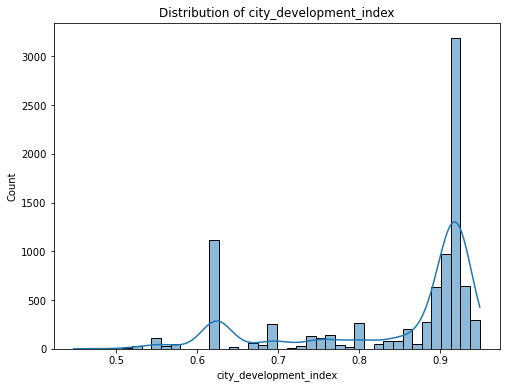

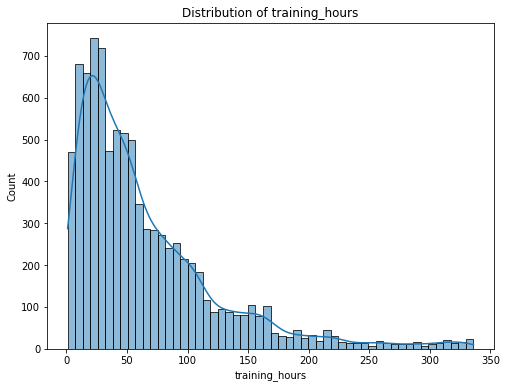

In [13]:
num_feature = ['city_development_index', 'training_hours']
for feature in num_feature:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=feature, kde=True)       # Exploring numerical features of training dataset
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

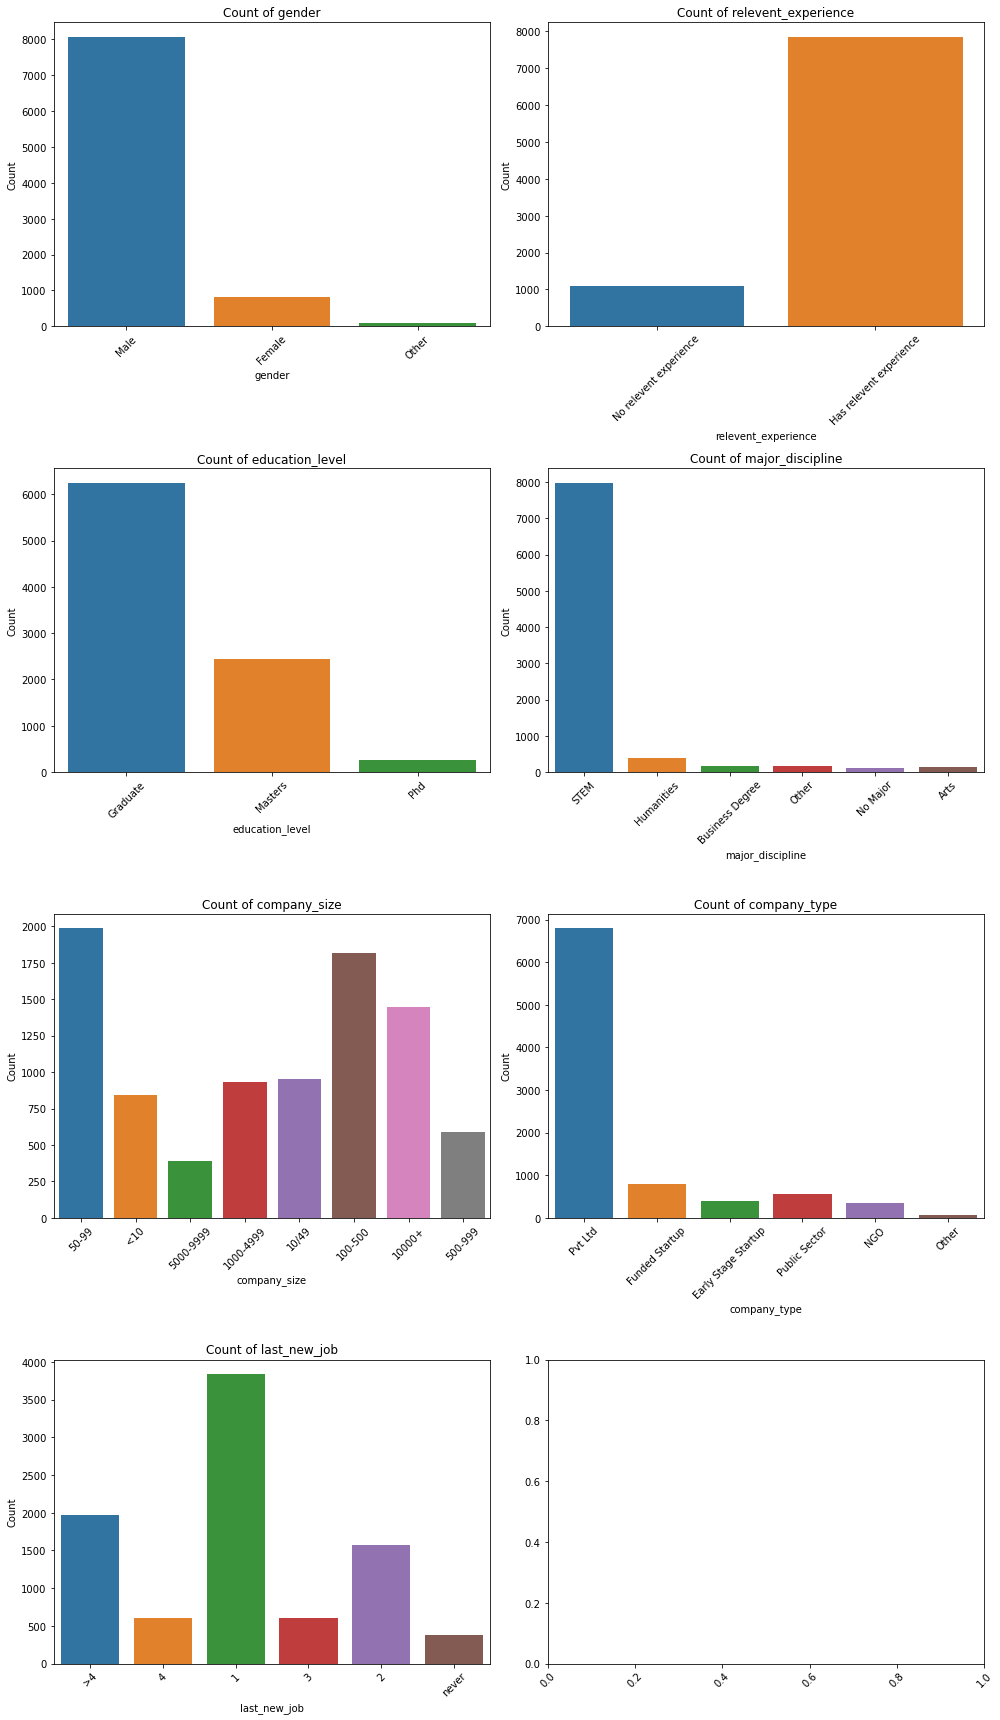

In [14]:
cat_feature = ['gender', 'relevent_experience','education_level','major_discipline','company_size','company_type','last_new_job']
num_rows=(len(cat_feature) +1)//2
fig, axes=plt.subplots(num_rows, 2, figsize=(14,6*num_rows))
for i, feature in enumerate(cat_feature):
    row=i//2
    col=i%2
    ax=axes[row, col]
    sns.countplot(data=df, x=feature, ax=ax)       # Exploring categorical features of training dataset
    ax.set_title(f"Count of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
    

#### 2.2) Testing Dataset

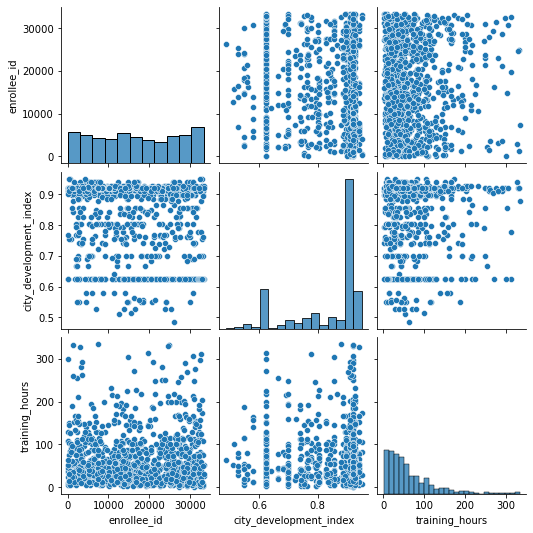

In [15]:
sns.pairplot(data=df_)

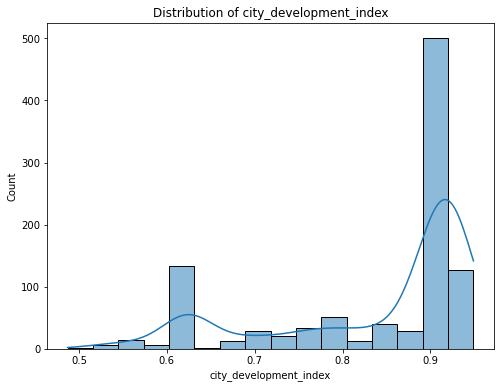

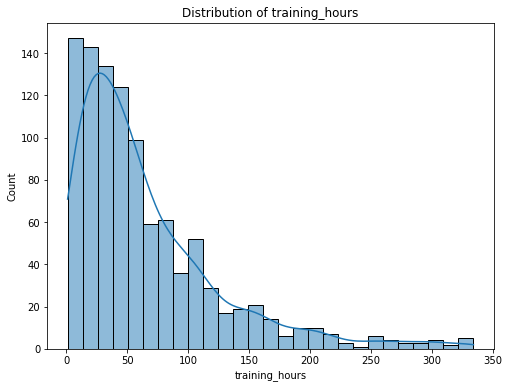

In [16]:
num_feature = ['city_development_index', 'training_hours']
for feature in num_feature:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df_, x=feature, kde=True)       # Exploring numerical features of testing dataset
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

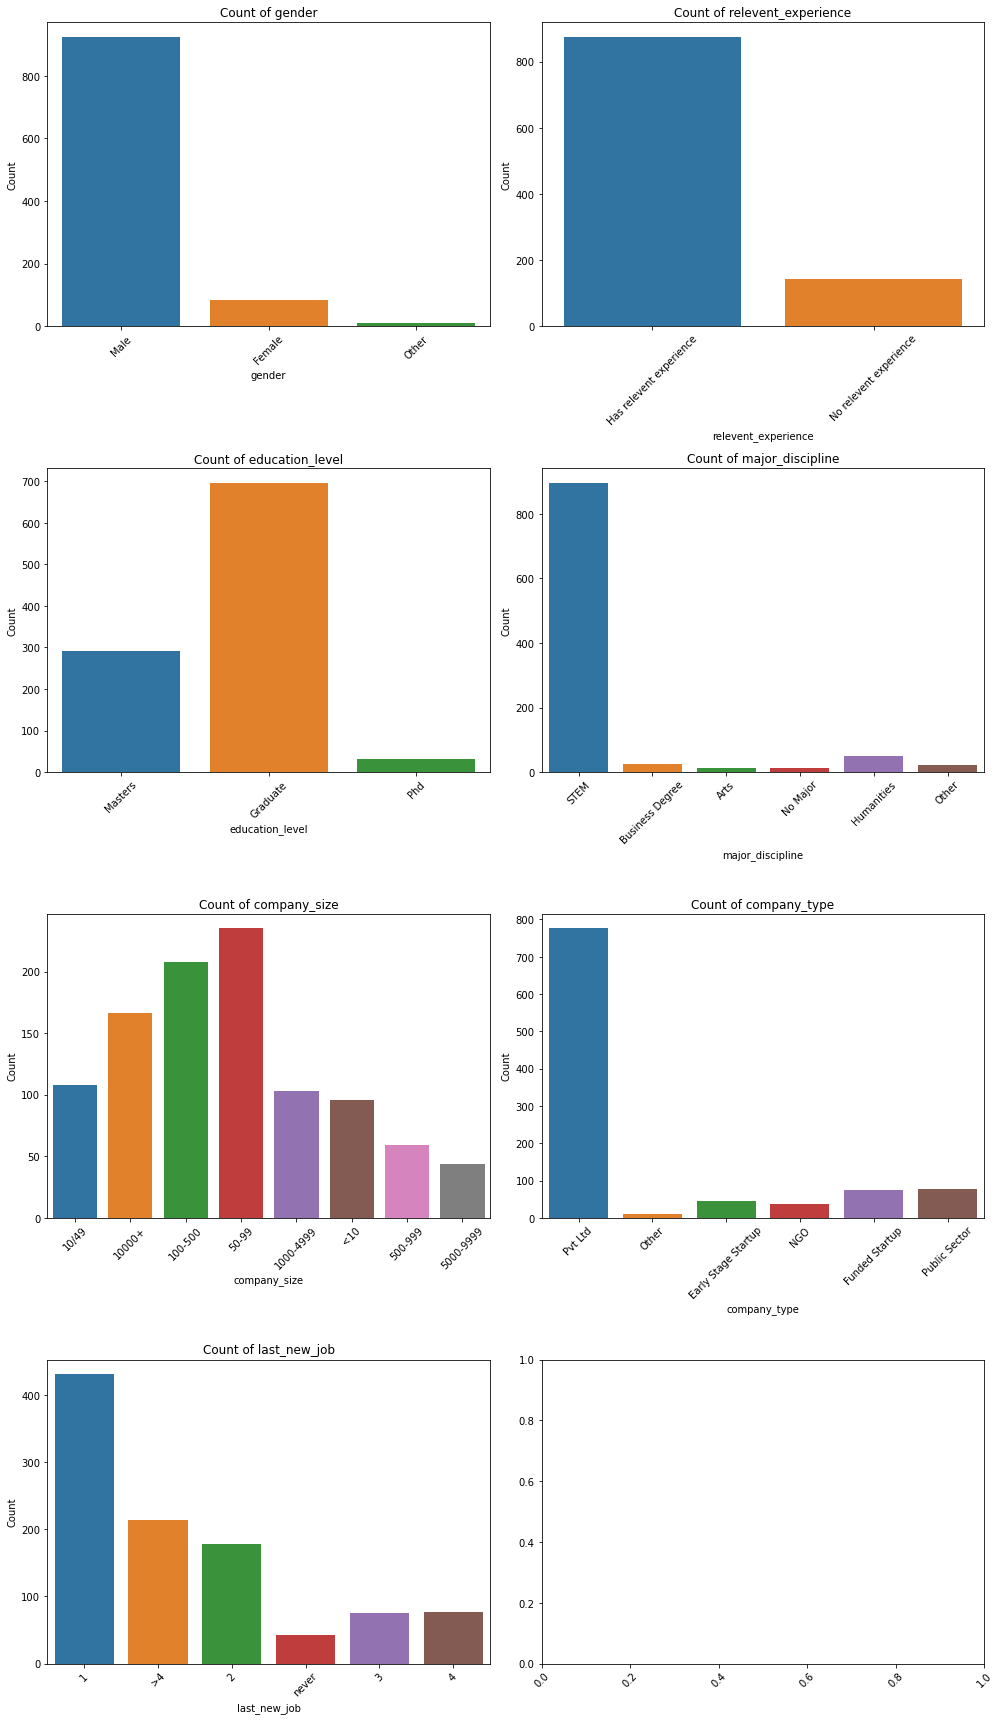

In [17]:
fig, axes=plt.subplots(num_rows, 2, figsize=(14,6*num_rows))
for i, feature in enumerate(cat_feature):
    row=i//2
    col=i%2
    ax=axes[row, col]
    sns.countplot(data=df_, x=feature, ax=ax)       # Exploring categorical features of testing dataset
    ax.set_title(f"Count of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### 3) Data transformation

#### 3.1) Training dataset

In [25]:
# label encoding of categorical values 
le = LabelEncoder()
df_train_encoded = df.drop('target', axis = 1).copy()
for column in df_train_encoded.columns:
    if df[column].dtype == object:
        df_train_encoded[column] = le.fit_transform(df_train_encoded[column])

df_train_encoded.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1,29725,72,0.776,1,1,2,0,5,6,4,5,4,47
4,666,48,0.767,1,0,2,1,5,21,4,1,3,8
7,402,78,0.762,1,0,2,0,5,4,7,5,4,18
8,27107,5,0.920,1,0,2,0,5,17,4,5,0,46
11,23853,5,0.920,1,0,2,0,5,15,6,5,0,108


In [26]:
# Scaler transformation of the dataset
scaler = StandardScaler()
train = scaler.fit_transform(df_train_encoded)

train = pd.DataFrame(train, columns = [df_train_encoded.columns])

train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.290278,0.967986,-0.590248,0.267403,2.666723,0.402198,-0.626387,0.317543,-0.992973,0.468884,0.498507,1.375772,-0.300090
1,-1.626341,0.248843,-0.667720,0.267403,-0.374992,0.402198,1.270568,0.317543,1.184322,0.468884,-2.113239,0.802960,-0.947589
2,-1.652838,1.147772,-0.710760,0.267403,-0.374992,0.402198,-0.626387,0.317543,-1.283279,1.923958,0.498507,1.375772,-0.781564
3,1.027512,-1.039623,0.649299,0.267403,-0.374992,0.402198,-0.626387,0.317543,0.603710,0.468884,0.498507,-0.915476,-0.316692
4,0.700912,-1.039623,0.649299,0.267403,-0.374992,0.402198,-0.626387,0.317543,0.313404,1.438933,0.498507,-0.915476,0.712665


#### 3.2) Testing dataset

In [29]:
# Label encoding
df_test_encoded = df_.copy()
for column in df_test_encoded.columns:
    if df_[column].dtype == object:
        df_test_encoded[column] = le.fit_transform(df_test_encoded[column])
        
df_test_encoded.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3,27385,25,0.827,1,0,2,1,5,2,0,5,0,39
4,27724,5,0.920,1,0,2,0,5,21,3,5,4,72
11,9272,109,0.698,1,0,2,0,5,12,0,5,1,51
12,14249,78,0.762,1,0,2,0,5,18,1,3,5,48
16,7865,60,0.624,1,0,2,1,5,14,1,5,0,4


In [30]:
# Scaler Transformation
test = scaler.fit_transform(df_test_encoded)
test = pd.DataFrame(test, columns = [df_test_encoded.columns])

test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.048874,-0.452359,-0.107581,0.248377,-0.405674,0.429781,1.219453,0.33862,-1.645724,-1.471232,0.483046,-0.924178,-0.425838
1,1.082715,-1.071255,0.683718,0.248377,-0.405674,0.429781,-0.646347,0.33862,1.149264,-0.012407,0.483046,1.384001,0.117067
2,-0.759248,2.147004,-1.205188,0.248377,-0.405674,0.429781,-0.646347,0.33862,-0.174678,-1.471232,0.483046,-0.347133,-0.228418
3,-0.262421,1.187715,-0.660639,0.248377,-0.405674,0.429781,-0.646347,0.33862,0.707950,-0.984957,-0.859994,1.961046,-0.277773
4,-0.899701,0.630709,-1.834823,0.248377,-0.405674,0.429781,1.219453,0.33862,0.119532,-0.984957,0.483046,-0.924178,-1.001646


### 4) Performing data modelling using multiple classification ML algorithms

In [32]:
X = train
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [37]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier()        # Initializing and training different models
random_forest.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [38]:
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)                 # Making predictions on the test set
y_pred_svm = svm.predict(X_test)


In [39]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)                   # Evaluating the performance of the models

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Decision Tree:", accuracy_dt)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of KNN:", accuracy_knn)
print("Accuracy of SVM:", accuracy_svm)

Accuracy of Logistic Regression: 0.8362486043915147
Accuracy of Decision Tree: 0.7901004838109416
Accuracy of Random Forest: 0.8455526609601787
Accuracy of KNN: 0.8254558987718645
Accuracy of SVM: 0.8414588760699665


Random Forest is with highest accuracy

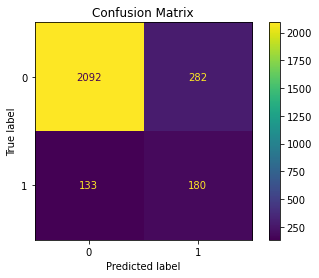

ACCURACY:  0.8455526609601787


In [45]:
cm = confusion_matrix(random_forest.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print('ACCURACY: ',accuracy_rf)